# ACML Assignment 1 - Linear Regression Model 
## Brenton Budler -  1827655

This implementation of the Linear Regression Model will be carried out on a dataset from an E-commerce company based in New York City that sells clothing online and also have in-store style and clothing advice sessions. The data set contains each custoemrs email address, home address and the color of their avatar. It also contains the following numerical columns: 
* Avg. Session Length: Average session length of in-store style advice sessions (in minutes)
* Time on App: Average time spent on App (in minutes)
* Time on Website: Average time spent on Website (in minutes)
* Length of Membership: How long the customer has been a member (in years)
* Yearly Amount Spent: The amount of money the customer spends in a year.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Import the data
The first step in the process is to import the necessary data.

In [2]:
raw_data = pd.read_csv('Ecom.csv')
raw_data.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

## 2. Exploratory Data Analysis 

For the simple linear regression, we are looking for two varaibles in our data that are linearly correlated.

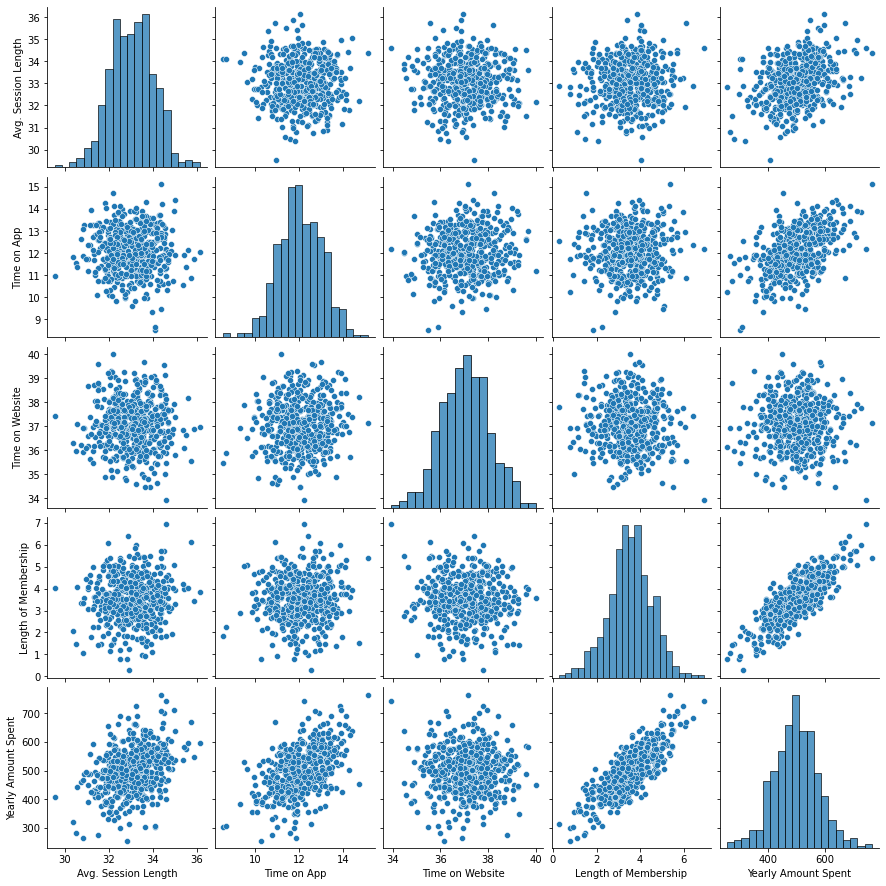

In [3]:
sns.pairplot(raw_data)
plt.show()

As we can see "Length of Membership" and "Yearly Amount Spent" seem to have a positive linear correlation, let's explore this relationship further:

In [4]:
data = pd.DataFrame()
data['memb_len'] = raw_data['Length of Membership']
data['yr_spend'] = raw_data['Yearly Amount Spent']
data.head()

memb_len    yr_spend
0  4.082621  587.951054
1  2.664034  392.204933
2  4.104543  487.547505
3  3.120179  581.852344
4  4.446308  599.406092

Text(0, 0.5, 'Yearly Amount Spent')

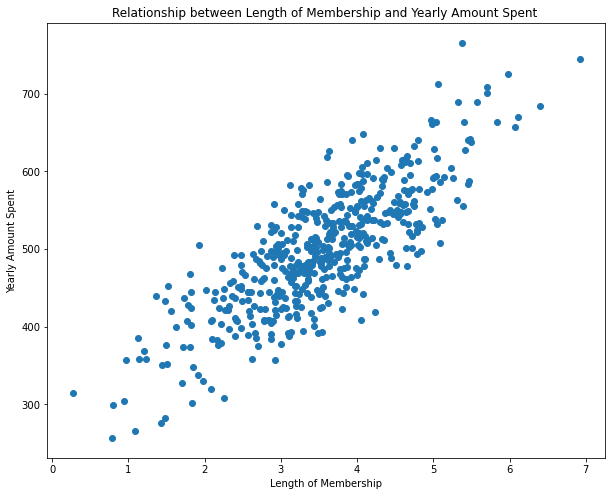

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(x='memb_len', y = 'yr_spend', data = data)
plt.title("Relationship between Length of Membership and Yearly Amount Spent ")
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

Due to their positivly correlated linear relationship these two variables will work well for fitting a simple linear regression.

## 3. Training and Testing Data

Now that we have explored the data a bit we can split our data into the data that will be used to train the model and the data that will be used to test it at a later stage.

In [6]:
from sklearn.model_selection import train_test_split

X = data['memb_len']
y = data['yr_spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Building the Model 

First we will have to create the hypothesis function for the simple linear regression: $h_\theta = \theta_o + \theta_1x$

In [7]:
def hyp_func(theta0, theta1, x1):
    return theta0 + theta1*x1

Next we create the cost function $J(\theta_0,\theta_1) = \frac{1}{2n} \displaystyle \sum _{i=1} ^{n} (h_\theta x^{(i)} - y^{(i)})^2$

In [8]:
def cost_func(theta0,theta1, x=X_train, y=y_train):
    n = len(x)
    total = sum(np.square(hyp_func(theta0=theta0, theta1=theta1, x1=x)-y))
    return (0.5*n)*total 

Next we create a function that will be used to update each $\theta$ value during the gradient descent using $\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1)$. The parametetrs 'reg' and 'lam' are used later when implementing regularization in the form  $\theta_j := \theta_j(1 - \alpha \frac{\lambda}{n}) - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1)$

In [9]:
def update_vals(curr_theta0,curr_theta1,x,y, learning_rate, reg= False, lam =0):
    n = len(x)
    
    if not reg:
        temp_theta0  = curr_theta0 - (learning_rate * ((1/n)*sum(hyp_func(curr_theta0,curr_theta1,x)-y)))
        temp_theta1 = curr_theta1 - (learning_rate * ((1/n)*sum((hyp_func(curr_theta0,curr_theta1,x)-y)*x)))
    else:
        temp_theta0  = curr_theta0 - (learning_rate * ((1/n)*sum(hyp_func(curr_theta0,curr_theta1,x)-y)))
        temp_theta1 = curr_theta1*(1-learning_rate * (lam/n)) - (learning_rate * ((1/n)*sum((hyp_func(curr_theta0,curr_theta1,x)-y)*x)))
   
    return [temp_theta0, temp_theta1]

With these helper functions in-place we can begin to construct the linear regression model.

In [10]:
def linear_regression(X,Y,learning_rate,iterations, results=False , graph=False , reg = False, lam =0 ):
    theta0 = 0 #Stores the current value of theta0 
    theta1 = 0 #Stores the current value of theta 1 
    iter_num = 0 #Stores the current iteration number
    
    t0s = [] #Stores the different values of theta0 
    t1s = [] #Stores the different values of theta1 
    costs = [] #Stores the associated cost for each pair of theta0 and theta1 
    iter_numbers = [] #Stores the different iteration numbers 
    
    for i in range(0,iterations):
        
        #Keeping track of the current values 
        t0s.append(theta0)
        t1s.append(theta1)
        costs.append(cost_func(theta0,theta1,X,Y))
        iter_numbers.append(iter_num)
        
        #Adjusting the values using the functions outlined above 
        theta0, theta1 = update_vals(theta0,theta1,X,Y, learning_rate=learning_rate, reg = reg, lam = lam)
        
        #Plotting the current fit 
        if graph:
            Y_pred = hyp_func(theta0,theta1,X)
            plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],alpha=0.1, c='lightskyblue',zorder=1)
        
        #Increasing the iteration number 
        iter_num+=1
    
    #This concatenates all the results in a dataframe which can be used to analyze the process 
    res_df = pd.DataFrame()
    res_df['Theta0'] = t0s 
    res_df['Theta1'] = t1s
    res_df['Cost'] = costs
    res_df['Iter'] = iter_numbers
    
    #The function can either return the dataframe of results or simply the values it has found for theta0 and theta1
    if results:
        return res_df
    else:
        return theta0,theta1

## 6. Implementing the Model 

### 6.1 Fitting the Model

Now we can fit the model to the training data.

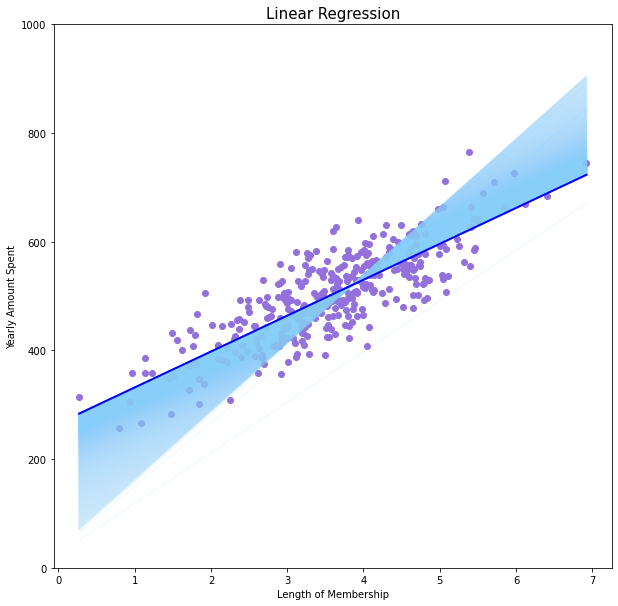

In [11]:
plt.figure(figsize=(10,10))

#Fit the regression
final_theta0, final_theta1 = linear_regression(X_train,y_train,0.05,iterations=1000,results=False , graph=True)
Y_pred = hyp_func(final_theta0,final_theta1,X_train)

#Plot the line of regression
final, = plt.plot([min(X_train),max(X_train)],[min(Y_pred),max(Y_pred)], c='blue',linewidth=2,zorder=2, label ='Final Fit')

plt.ylim([0,1000])
plt.scatter(X_train,y_train,zorder=0,c='mediumpurple')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Linear Regression', fontsize=15)
plt.show()

The light-blue lines represent the temporary regression lines that are found while the gradient descent algorithm is running whilst the darkblue line represents the final regression line found by the linear regression model.

### 6.2 Visualizing Gradient Descent 

To get a better understanding of the Gradient Descent Process which is being used to find the values of $\theta_0$ and $\theta_1$ we can visualize it using a contour plot of the Cost Function. 

In [12]:
from itertools import product

def find_cost(t0,t1,x,y): #Used to calculate the corresponding cost function for an array of theta0s and theta1s
    c = []
    for i in range(len(t0)):
        c.append(cost_func(t0[i],t1[i],x,y))
    return c

def plot_grad_descent(result_df,x,y,xlimits, ylimits,levels):
    dat0 = np.linspace(xlimits[0],xlimits[1],50) #Creates the theta0 values used for contour
    dat1 = np.linspace(ylimits[0],ylimits[1],50) #Creates the theta1 values used for contour
    
    #Creates a dataframe containing all possible combinations of theta0 and theta1 values
    plot_df = pd.DataFrame(product(dat0, dat1), columns=['Theta0', 'Theta1']) 
    #Calculates the cost of all possible combinations of theta0 and theta1
    dat2 = find_cost(plot_df.Theta0,plot_df.Theta1,x,y)
    plot_df['Cost'] = dat2# Adds costs to the dataframe

    #Creates a pivot table where the indices are the theta0 values, the columns are the theta1 values, 
    #and the values are the corresponding cost for a given theta0 and theta1 value 
    Cost_grid = plot_df.pivot_table(index='Theta0', columns='Theta1', values='Cost').T.values

    #Creates the grid of values necessary for plotting 
    Theta0_unique = np.sort(plot_df.Theta0.unique())
    Theta1_unique = np.sort(plot_df.Theta1.unique())
    Theta0_grid, Theta1_grid = np.meshgrid(Theta0_unique, Theta1_unique)

    plt.figure(figsize=(12,8))
    plt.contour(Theta0_grid, Theta1_grid, Cost_grid, levels=levels)
    plt.title('Visualizing Gradient Descent', fontsize=20)
    plt.colorbar(label='$J(\\theta_0, \\theta_1)$')
    plt.xlabel('$\\theta_0$')
    plt.ylabel('$\\theta_1$')

    plt.scatter(x='Theta0',y = 'Theta1' , data=result_df , c='lightskyblue' ,s =10 )
    plt.plot(result_df['Theta0'],result_df['Theta1'],c='lightskyblue')


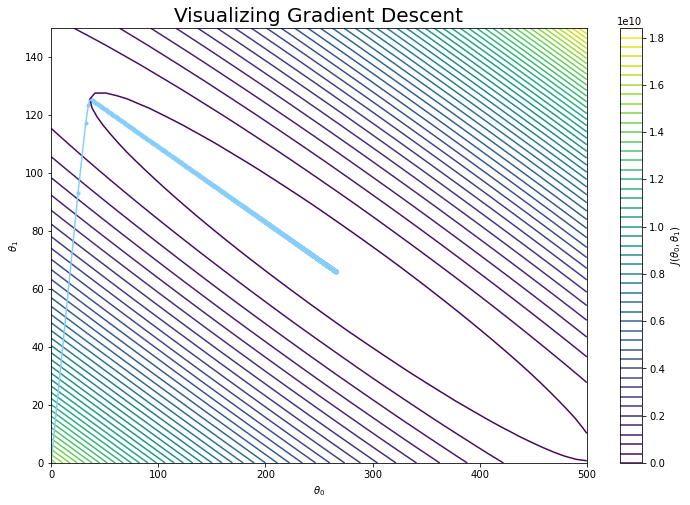

In [13]:
results = linear_regression(X_train,y_train,0.05,iterations=1000,results=True , graph=False)
plot_grad_descent(results, x= X_train, y =y_train, xlimits=(0,500), ylimits=[0,150], levels = 50)

### 6.2 Exploring the effect of different learning rates on convergence 

Now that we have fit our linear regression model we can alter the parameters and see what effect this has on our model. First we will see which learning rates cause our cost function to converge the fastest. Fewer iterations are used to show the effect of this on the convergence more clearly.

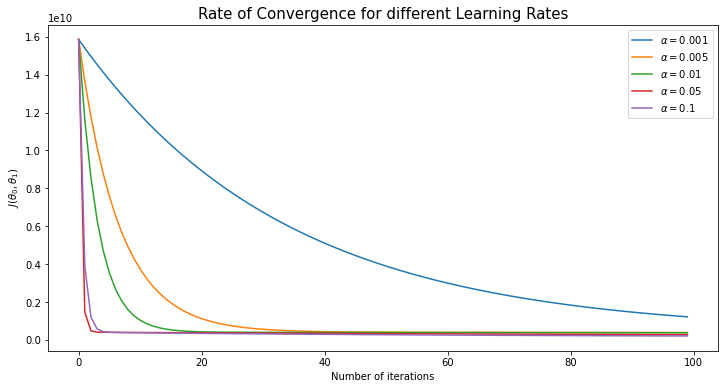

In [14]:
plt.figure(figsize=(12,6))
results = linear_regression(X_train,y_train,0.001,100,results=True)
results.Cost.plot( label = '$\\alpha=0.001$')
results = linear_regression(X_train,y_train,0.005,100,results=True)
results.Cost.plot( label = '$\\alpha=0.005$')
results = linear_regression(X_train,y_train,0.01,100,results=True)
results.Cost.plot(label = '$\\alpha=0.01$')
results = linear_regression(X_train,y_train,0.05,100,results=True)
results.Cost.plot(label = '$\\alpha=0.05$')
results = linear_regression(X_train,y_train,0.1,100,results=True)
results.Cost.plot(label = '$\\alpha=0.1$')
plt.title('Rate of Convergence for different Learning Rates', fontsize=15)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()

plt.show()

We can clearly see that learning rates that are too small take much longer to converge. From the plot we can see that 0.05 and 0.1 would be  good learning rates to use. It is also important to explore what happens when our learning rate is too large:

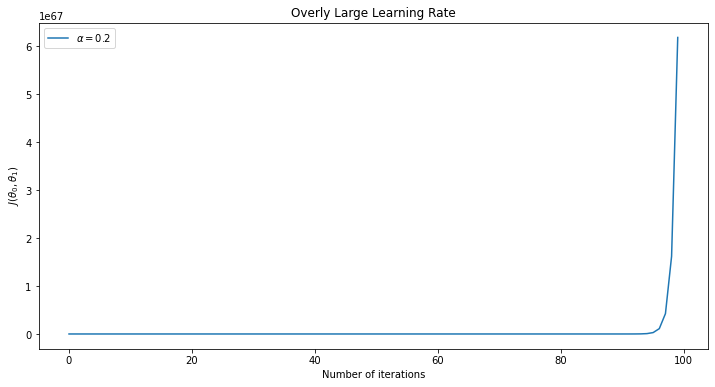

In [15]:
plt.figure(figsize=(12,6))

results = linear_regression(X_train,y_train,0.2,100,results=True)
results.Cost.plot(label = '$\\alpha=0.2$')

plt.title('Overly Large Learning Rate')
plt.xlabel('Number of iterations')
plt.ylabel('$J(\\theta_0, \\theta_1)$')
plt.legend()
plt.show()

As we can see, as soon as the learning rate is too large, the value of our cost function begins to diverge as opposed to converging as it did with smaller learning rates.

## 7. Improved Learning

With our original model built we can now implement varaious improved learning techniques in an attempt to optimize our model.

### 7.2 Feature Scaling 

The first of these improved learning techniques we can implement is feature scaling. We are only using one feature ('Length of Membership') to try and predict our target varaible ('Yearly Amount Spent') so instead of scaling different input feautres we can scale both our input and output features to create the same effect.

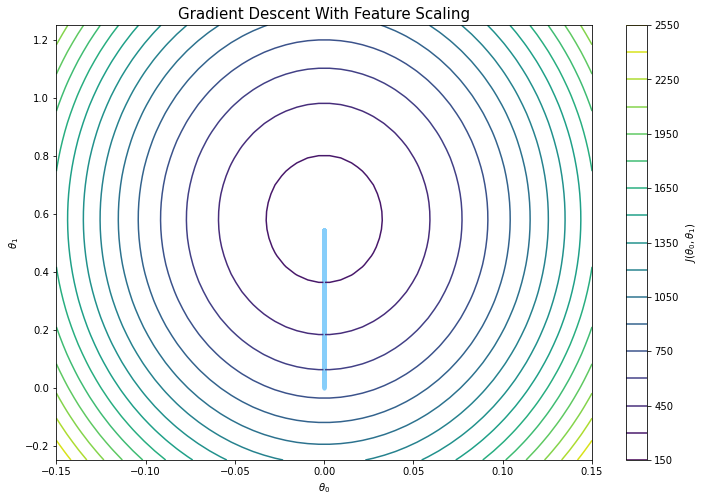

In [16]:
scaled_X_train = (X_train-X_train.mean())/max(X_train)
scaled_y_train = (y_train-y_train.mean())/max(y_train)

scaled_results = linear_regression(scaled_X_train,scaled_y_train,0.1,iterations=1250,results=True , graph=False)
plot_grad_descent(scaled_results, x= scaled_X_train, y = scaled_y_train,xlimits=[-0.15,0.15], ylimits=[-0.25,1.25], levels=20)
plt.title('Gradient Descent With Feature Scaling',fontsize = 15)
plt.show()

### 7.3 Feature Standardization

The second improved learning technique we can implement is feature standardization. Again because we are only using one feature to predict our target varaible we can standardize both our input feauture and our output feauture. With the implementation of this improved learning technique we can see that our model converges much faster and we can considerably reduce the number of iterations (from the original 1000 or more to a mere 50) for our linear model and observe that the cost function still converges.

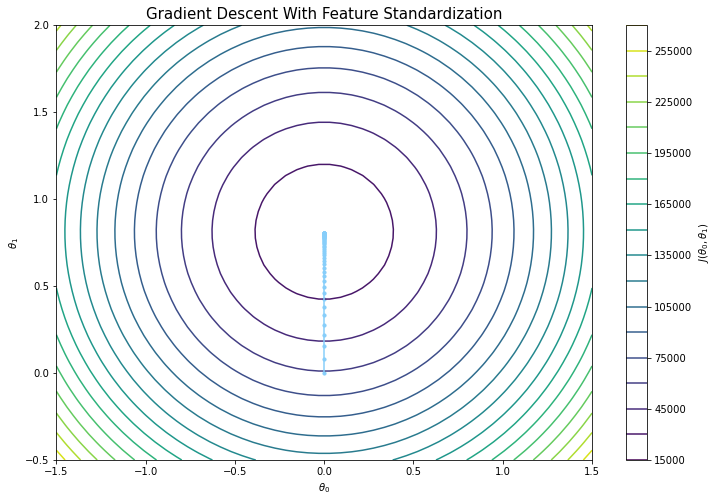

In [17]:
standardized_X_train = (X_train-X_train.mean())/X_train.std()
standardized_y_train = (y_train-y_train.mean())/y_train.std()

standardized_results = linear_regression(standardized_X_train,standardized_y_train,0.1,iterations=50,results=True , graph=False)
plot_grad_descent(standardized_results, x= standardized_X_train, y = standardized_y_train,xlimits=[-1.5,1.5], ylimits=[-0.5,2], levels=20)
plt.title('Gradient Descent With Feature Standardization',fontsize = 15)
plt.show()

### 7.4 Regularization

Regularization allows us to ensure that we are not overfitting our model to the data and does this by punishing large values of $\theta_j$ in our hypothesis function. Because this is only a simple linear function the only theta value it can try to reduce is $\theta_1$ as regularization is not done one $\theta_0$.

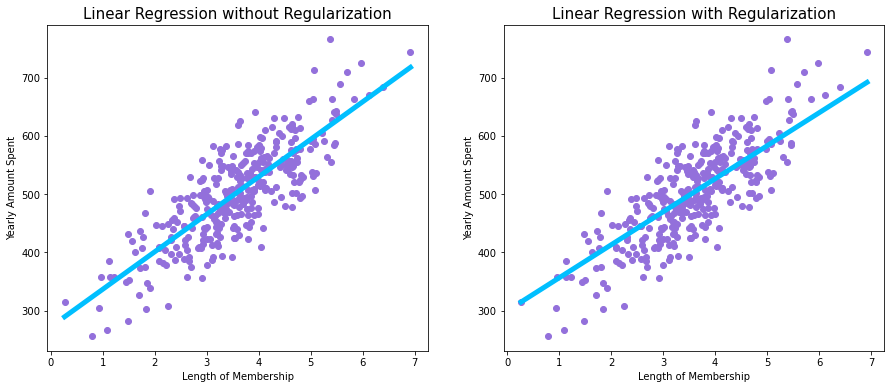

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2,figsize=(15,6))

#Fit the normal regression
final_theta0, final_theta1 = linear_regression(X_train,y_train,0.1,1000,results=False , graph=False)
Y_pred = hyp_func(final_theta0,final_theta1,X_train)

ax1.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)], c='deepskyblue',linewidth=5,zorder=2)
ax1.scatter(X_train,y_train,zorder=0,c='mediumpurple')
ax1.set_xlabel('Length of Membership')
ax1.set_ylabel('Yearly Amount Spent')
ax1.set_title('Linear Regression without Regularization', fontsize=15)

#Fit regularized Linear regression
reg_theta0, reg_theta1 = linear_regression(X_train,y_train,0.1,1000,results=False , graph=False,reg=True,lam=50)
Y_pred = hyp_func(reg_theta0,reg_theta1,X_train)


ax2.plot([min(X_train),max(X_train)],[min(Y_pred),max(Y_pred)], c='deepskyblue',linewidth=5,zorder=2)
ax2.scatter(X_train,y_train,zorder=0,c='mediumpurple')
ax2.set_xlabel('Length of Membership')
ax2.set_ylabel('Yearly Amount Spent')
ax2.set_title('Linear Regression with Regularization', fontsize=15)

plt.show()

As we can see, in an attempt to keep the value of $\theta_1$ a little smaller and avoid overfitting, the addition of a regularization term has slightly altered our linear regression model.

### 7.5 Different approaches to Gradient Descent

The final technique we can use to try and optimize our model is to utilize different methods of implementing the gradient descent. Instead of feeding all of our training data to our model (batch gradient descent), as we have been doing, we can shuffle the data and then revaluate our values for $\theta_0$ and $\theta_1$ using every record in our data (stochastic gradient descent) or feed in small batches our data (mini-batch gradient descent). Note that these implementations are just slightly altered versions of the original linear regression above.

### 7.5.1 Stochastic Graident Descent

In [19]:
def stochastic_grad_descent(shuffled_data):
    alpha = 0.05
    theta0 = 0
    theta1 = 0 
    iterations = 100

    stoc_theta0 = []
    stoc_theta1 = [] 
    stoc_costs = [] 

    for j in range(iterations):

        for i in range(len(shuffled_data)):
            temp_x = shuffled_data.iloc[i,0]
            temp_y = shuffled_data.iloc[i,1]
            stoc_theta0.append(theta0)
            stoc_theta1.append(theta1)
            stoc_costs = cost_func(theta0,theta1)

            pred_y = theta0 + theta1*temp_x

            temp_theta0 = theta0 - alpha*(pred_y - temp_y)
            temp_theta1 = theta1 - alpha*((pred_y - temp_y)*temp_x)
            theta0 = temp_theta0
            theta1 = temp_theta1

    stoc_df = pd.DataFrame()
    stoc_df['Stoc_Theta_0'] = stoc_theta0
    stoc_df['Stoc_Theta_1'] = stoc_theta1 
    stoc_df['Stoc_Cost'] =stoc_costs
    return stoc_df


In [20]:
shuffled_data = data.sample(frac =1).reset_index(drop=True)
stoc_df = stochastic_grad_descent(shuffled_data=shuffled_data)

## 7.52 Mini-batch Gradient Descent

In [21]:
def mini_batch_grad_descent(shuffled_data):
    iterations = 100

    mbatch_theta0= 0
    mbatch_theta1= 0

    mbatch_theta0_list= []
    mbatch_theta1_list = [] 
    mbatch_costs = [] 


    for i in range(iterations):
        for x in range(50):
            mbatch_x = shuffled_data.iloc[x*10:x*10+10].iloc[:,0]
            mbatch_y = shuffled_data.iloc[x*10:x*10+10].iloc[:,1]
            mbatch_theta0_list.append(mbatch_theta0)
            mbatch_theta1_list.append(mbatch_theta1)
            mbatch_costs = cost_func(mbatch_theta0,mbatch_theta1)
            mbatch_theta0,mbatch_theta1 = update_vals(curr_theta0=mbatch_theta0,curr_theta1= mbatch_theta1,x= mbatch_x, y= mbatch_y, learning_rate=0.05)


    mbatch_df = pd.DataFrame()
    mbatch_df['Mini_Batch_Theta_0'] = mbatch_theta0_list
    mbatch_df['Mini_Batch_Theta_1'] = mbatch_theta1_list
    return mbatch_df

In [22]:
shuffled_data = data.sample(frac =1).reset_index(drop=True)
mbatch_df = mini_batch_grad_descent(shuffled_data)

Now we can explore how the cost function converges for these different implementations.

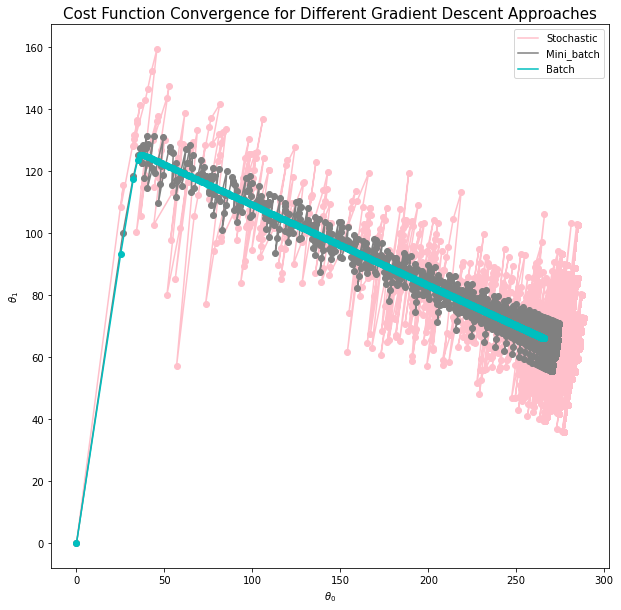

In [23]:
plt.figure(figsize=(10,10))

plt.scatter(x='Stoc_Theta_0',y = 'Stoc_Theta_1' , data=stoc_df, c ='pink', zorder = 0 )
stoc_line = plt.plot(stoc_df['Stoc_Theta_0'],stoc_df['Stoc_Theta_1'], c='pink', zorder=0, label= 'Stochastic')

plt.scatter(x = mbatch_df['Mini_Batch_Theta_0'], y =mbatch_df['Mini_Batch_Theta_1'],c='gray', zorder=1)
mbatch_line = plt.plot(mbatch_df['Mini_Batch_Theta_0'], mbatch_df['Mini_Batch_Theta_1'],zorder = 1,c='gray', label='Mini-batch')

batch_df = linear_regression(X_train, y_train,0.05,1000,results=True)
plt.scatter(x='Theta0',y = 'Theta1' , data=batch_df , c='c' , zorder =2)
batch_line = plt.plot(batch_df['Theta0'],batch_df['Theta1'],c='c', zorder = 2 , label = 'Batch')

plt.legend(labels = ['Stochastic','Mini_batch','Batch'])
plt.title('Cost Function Convergence for Different Gradient Descent Approaches',fontsize=15)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.show()


As we can see, although they use very different routes to get there, the three methods of implementation still converge to the same value.

## 8. Evaluating our Model

In [24]:
final_theta0, final_theta1 = linear_regression(X_train,y_train,0.1,1000,results=False , graph=False)
y_pred = hyp_func(final_theta0,final_theta1,X_test)

eval_df = pd.DataFrame()
eval_df['Target Amount'] = y_test
eval_df['Predicted Amount'] = y_pred
eval_df['Perc Difference'] = abs(eval_df['Target Amount']-eval_df['Predicted Amount'])/eval_df['Predicted Amount']*100

eval_df['Perc Difference'].describe()

count    150.000000
mean       7.420863
std        5.569626
min        0.033593
25%        3.261147
50%        6.383053
75%       10.662618
max       24.243070
Name: Perc Difference, dtype: float64

As we can see from these results our model's predictions are, on average, only 7.42% off of the original value.  The average Yearly Amount Spent is about 500 dollars so this means our predictions are off by about 37 dollars on avergae. Depending on how the company inteded to use this information, this accuracy may or may not be sufficient. 